# AdaBoost

In [2]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Amount of Say')

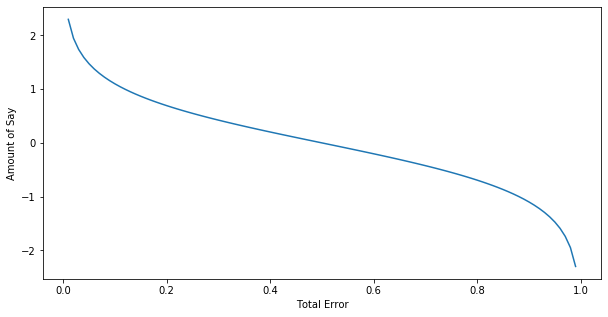

In [5]:
plt.figure(figsize=(10,5))
x = np.arange(0,1,0.01)
plt.plot(x, 0.5*np.log((1-x)/x))
plt.xlabel('Total Error')
plt.ylabel('Amount of Say')

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


X,Y = make_classification(n_samples=100, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=102)
clf = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')
clf.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=4, random_state=0)

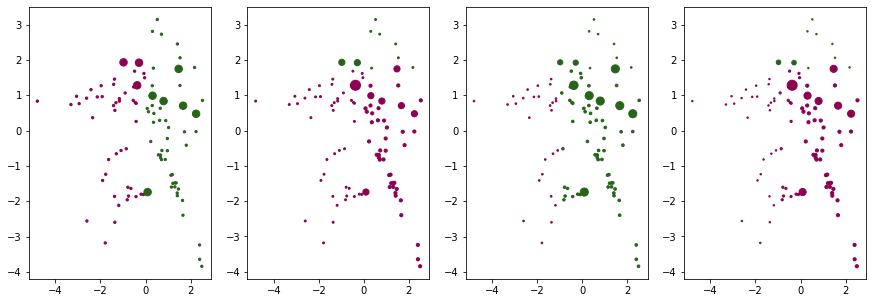

In [48]:
w = [1/Y.shape[0]]*Y.shape[0]

fig, axs = plt.subplots(1,4,figsize=(15,5))

for stump,ax_ in zip(clf.estimators_,axs.ravel()):
    y_pred_stump=stump.predict(X)
    error =  np.dot(w , Y != y_pred_stump)/np.sum(w)
    alpha= np.log((1-error)/error)
    w = w*np.exp(alpha*(Y != y_pred_stump))
    w = w/ w.sum()
    ax_.scatter(X[:,0], X[:,1], c=y_pred_stump, s=1000*w, cmap='PiYG')
    

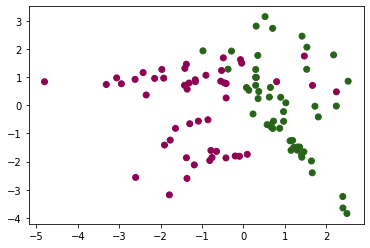

In [51]:
figsize=(5,3)
plt.scatter(X[:,0], X[:,1], c=Y,cmap='PiYG')